In [1]:
#   CITIES OF TOMORROW – URBAN SUSTAINABILITY ANALYSIS
#   Microsoft Fabric Data Days Notebooks Contest – Nov 2025
#   Author - Hrituraj Saha

In [2]:
# INSTALL DEPENDENCIES
!pip install xgboost shap plotly folium reportlab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 34.8 MB/s eta 0:00:0000:01


In [3]:
# IMPORTS
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import folium
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from IPython.display import display, Markdown
from reportlab.platypus import SimpleDocTemplate, Paragraph
from reportlab.lib.styles import getSampleStyleSheet

In [4]:
# LOAD DATA
df = pd.read_csv("/kaggle/input/dataset/Dataset.csv")
df.head()

building_density  road_connectivity  public_transport_access  \
0          0.367915           0.393821                 0.428129   
1          0.414306           0.608445                 0.658481   
2          0.827902           0.444679                 0.263853   
3          0.733936           0.742708                 0.012022   
4          0.769643           0.228268                 0.519082   

   air_quality_index  green_cover_percentage  carbon_footprint  \
0           0.414830                0.238555          0.921950   
1           0.490982                0.917681          0.178213   
2           0.264529                0.077883          0.295159   
3           0.486974                0.427303          0.975900   
4           0.945892                0.532321          0.370856   

   population_density  crime_rate  avg_income  renewable_energy_usage  \
0            0.126449    0.547160    0.932412                0.382358   
1            0.325124    0.764042    0.903241                0.377167   
2            0.042150    0.575736    0.208098                0.237949   
3            0.663838    0.826727    0.258951                0.876539   
4            0.429912    0.127542    0.180394                0.679006   

   disaster_risk_index  land_use_type_Commercial  land_use_type_Green Space  \
0             0.446242                       0.0                        0.0   
1             0.936824                       0.0                        1.0   
2             0.463054                       0.0                        0.0   
3             0.204293                       0.0                        0.0   
4             0.151421                       0.0                        0.0   

   land_use_type_Industrial  land_use_type_Residential  \
0                       1.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        1.0   
3                       1.0                        0.0   
4                       1.0                        0.0   

   urban_sustainability_score  
0                    0.259239  
1                    0.576923  
2                    0.252844  
3                    0.409002  
4                    0.686376

In [5]:
# DATA OVERVIEW
display(df.describe())
display(df.isna().sum())
Markdown("## No missing values → dataset is clean and ready.")

building_density  road_connectivity  public_transport_access  \
count       3476.000000        3476.000000              3476.000000   
mean           0.496345           0.490205                 0.501397   
std            0.287770           0.287484                 0.287163   
min            0.000000           0.000000                 0.000000   
25%            0.249740           0.241686                 0.256093   
50%            0.495439           0.483176                 0.499168   
75%            0.745671           0.734190                 0.752051   
max            1.000000           1.000000                 1.000000   

       air_quality_index  green_cover_percentage  carbon_footprint  \
count        3476.000000             3476.000000       3476.000000   
mean            0.494445                0.505579          0.509657   
std             0.287185                0.288395          0.288139   
min             0.000000                0.000000          0.000000   
25%             0.246493                0.256761          0.269287   
50%             0.488978                0.513606          0.507030   
75%             0.745491                0.757637          0.755210   
max             1.000000                1.000000          1.000000   

       population_density   crime_rate   avg_income  renewable_energy_usage  \
count         3476.000000  3476.000000  3476.000000             3476.000000   
mean             0.502158     0.499659     0.491556                0.499881   
std              0.286912     0.284553     0.285484                0.290146   
min              0.000000     0.000000     0.000000                0.000000   
25%              0.254415     0.255697     0.242244                0.245107   
50%              0.505622     0.499045     0.496457                0.498264   
75%              0.750379     0.739293     0.730656                0.752263   
max              1.000000     1.000000     1.000000                1.000000   

       disaster_risk_index  land_use_type_Commercial  \
count          3476.000000               3476.000000   
mean              0.494002                  0.252301   
std               0.287720                  0.434396   
min               0.000000                  0.000000   
25%               0.243494                  0.000000   
50%               0.493688                  0.000000   
75%               0.739163                  1.000000   
max               1.000000                  1.000000   

       land_use_type_Green Space  land_use_type_Industrial  \
count                3476.000000               3476.000000   
mean                    0.246835                  0.241945   
std                     0.431232                  0.428323   
min                     0.000000                  0.000000   
25%                     0.000000                  0.000000   
50%                     0.000000                  0.000000   
75%                     0.000000                  0.000000   
max                     1.000000                  1.000000   

       land_use_type_Residential  urban_sustainability_score  
count                3476.000000                 3476.000000  
mean                    0.258918                    0.482871  
std                     0.438104                    0.169391  
min                     0.000000                    0.000000  
25%                     0.000000                    0.360202  
50%                     0.000000                    0.482517  
75%                     1.000000                    0.606625  
max                     1.000000                    1.000000

building_density              0
road_connectivity             0
public_transport_access       0
air_quality_index             0
green_cover_percentage        0
carbon_footprint              0
population_density            0
crime_rate                    0
avg_income                    0
renewable_energy_usage        0
disaster_risk_index           0
land_use_type_Commercial      0
land_use_type_Green Space     0
land_use_type_Industrial      0
land_use_type_Residential     0
urban_sustainability_score    0
dtype: int64

## No missing values → dataset is clean and ready.

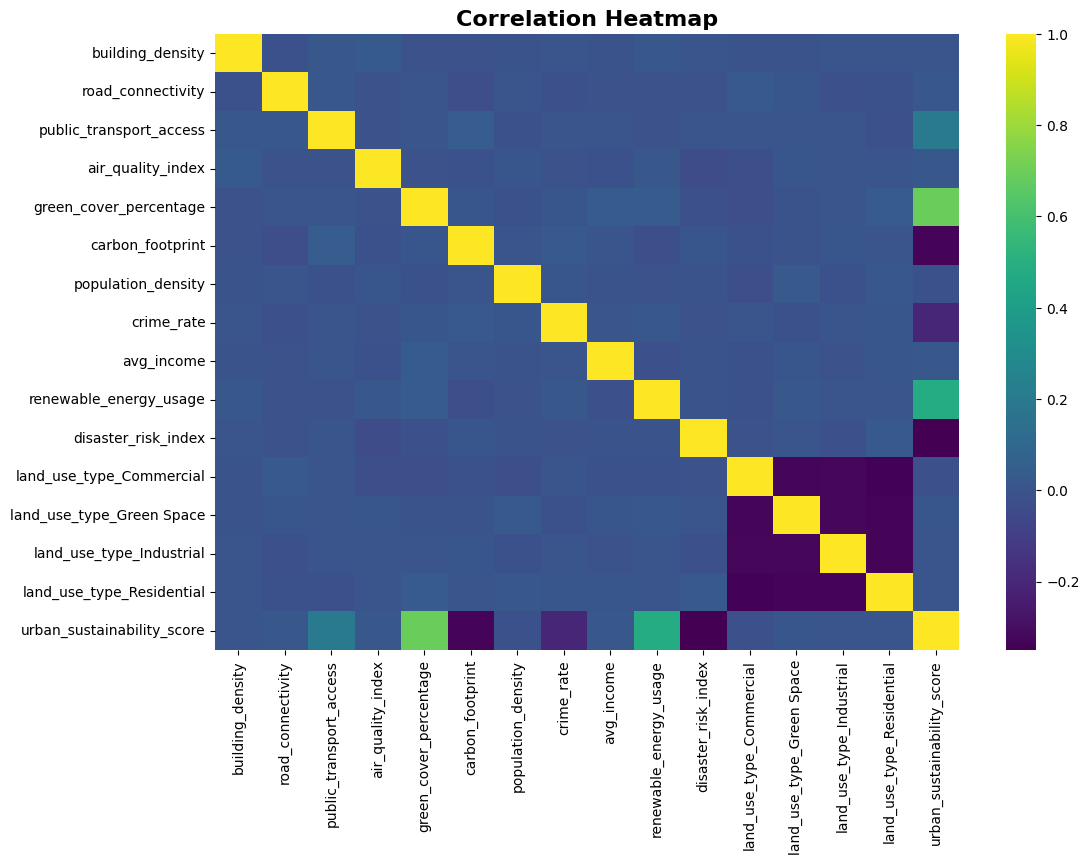

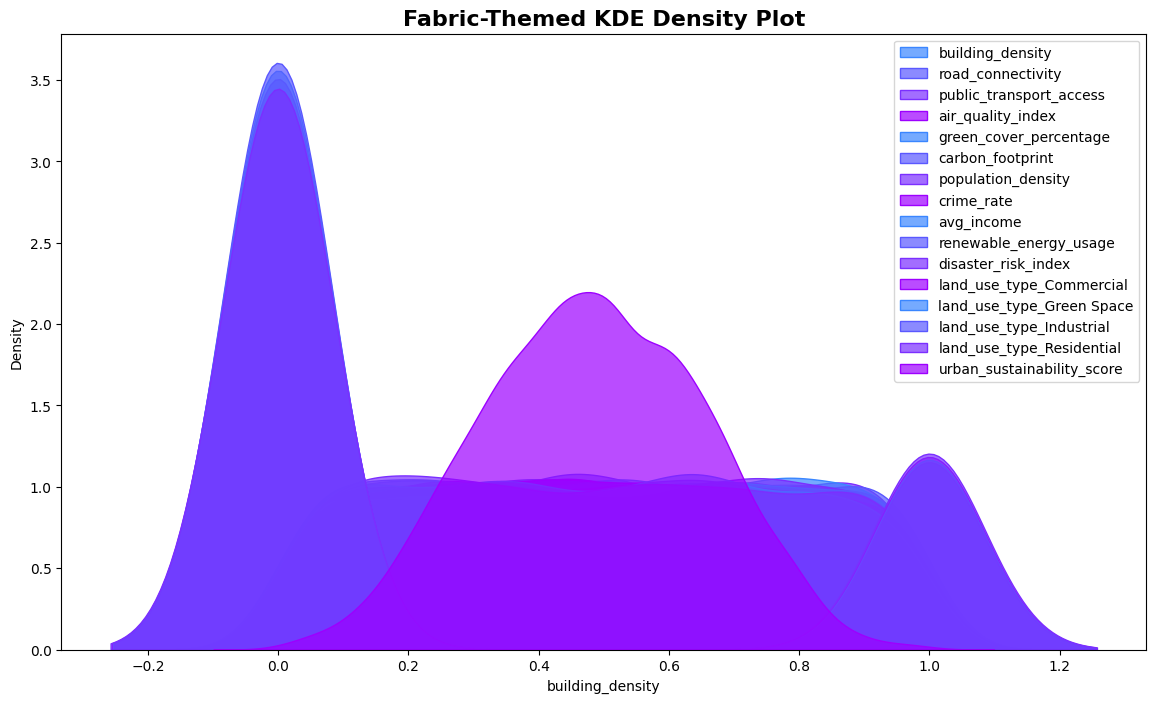

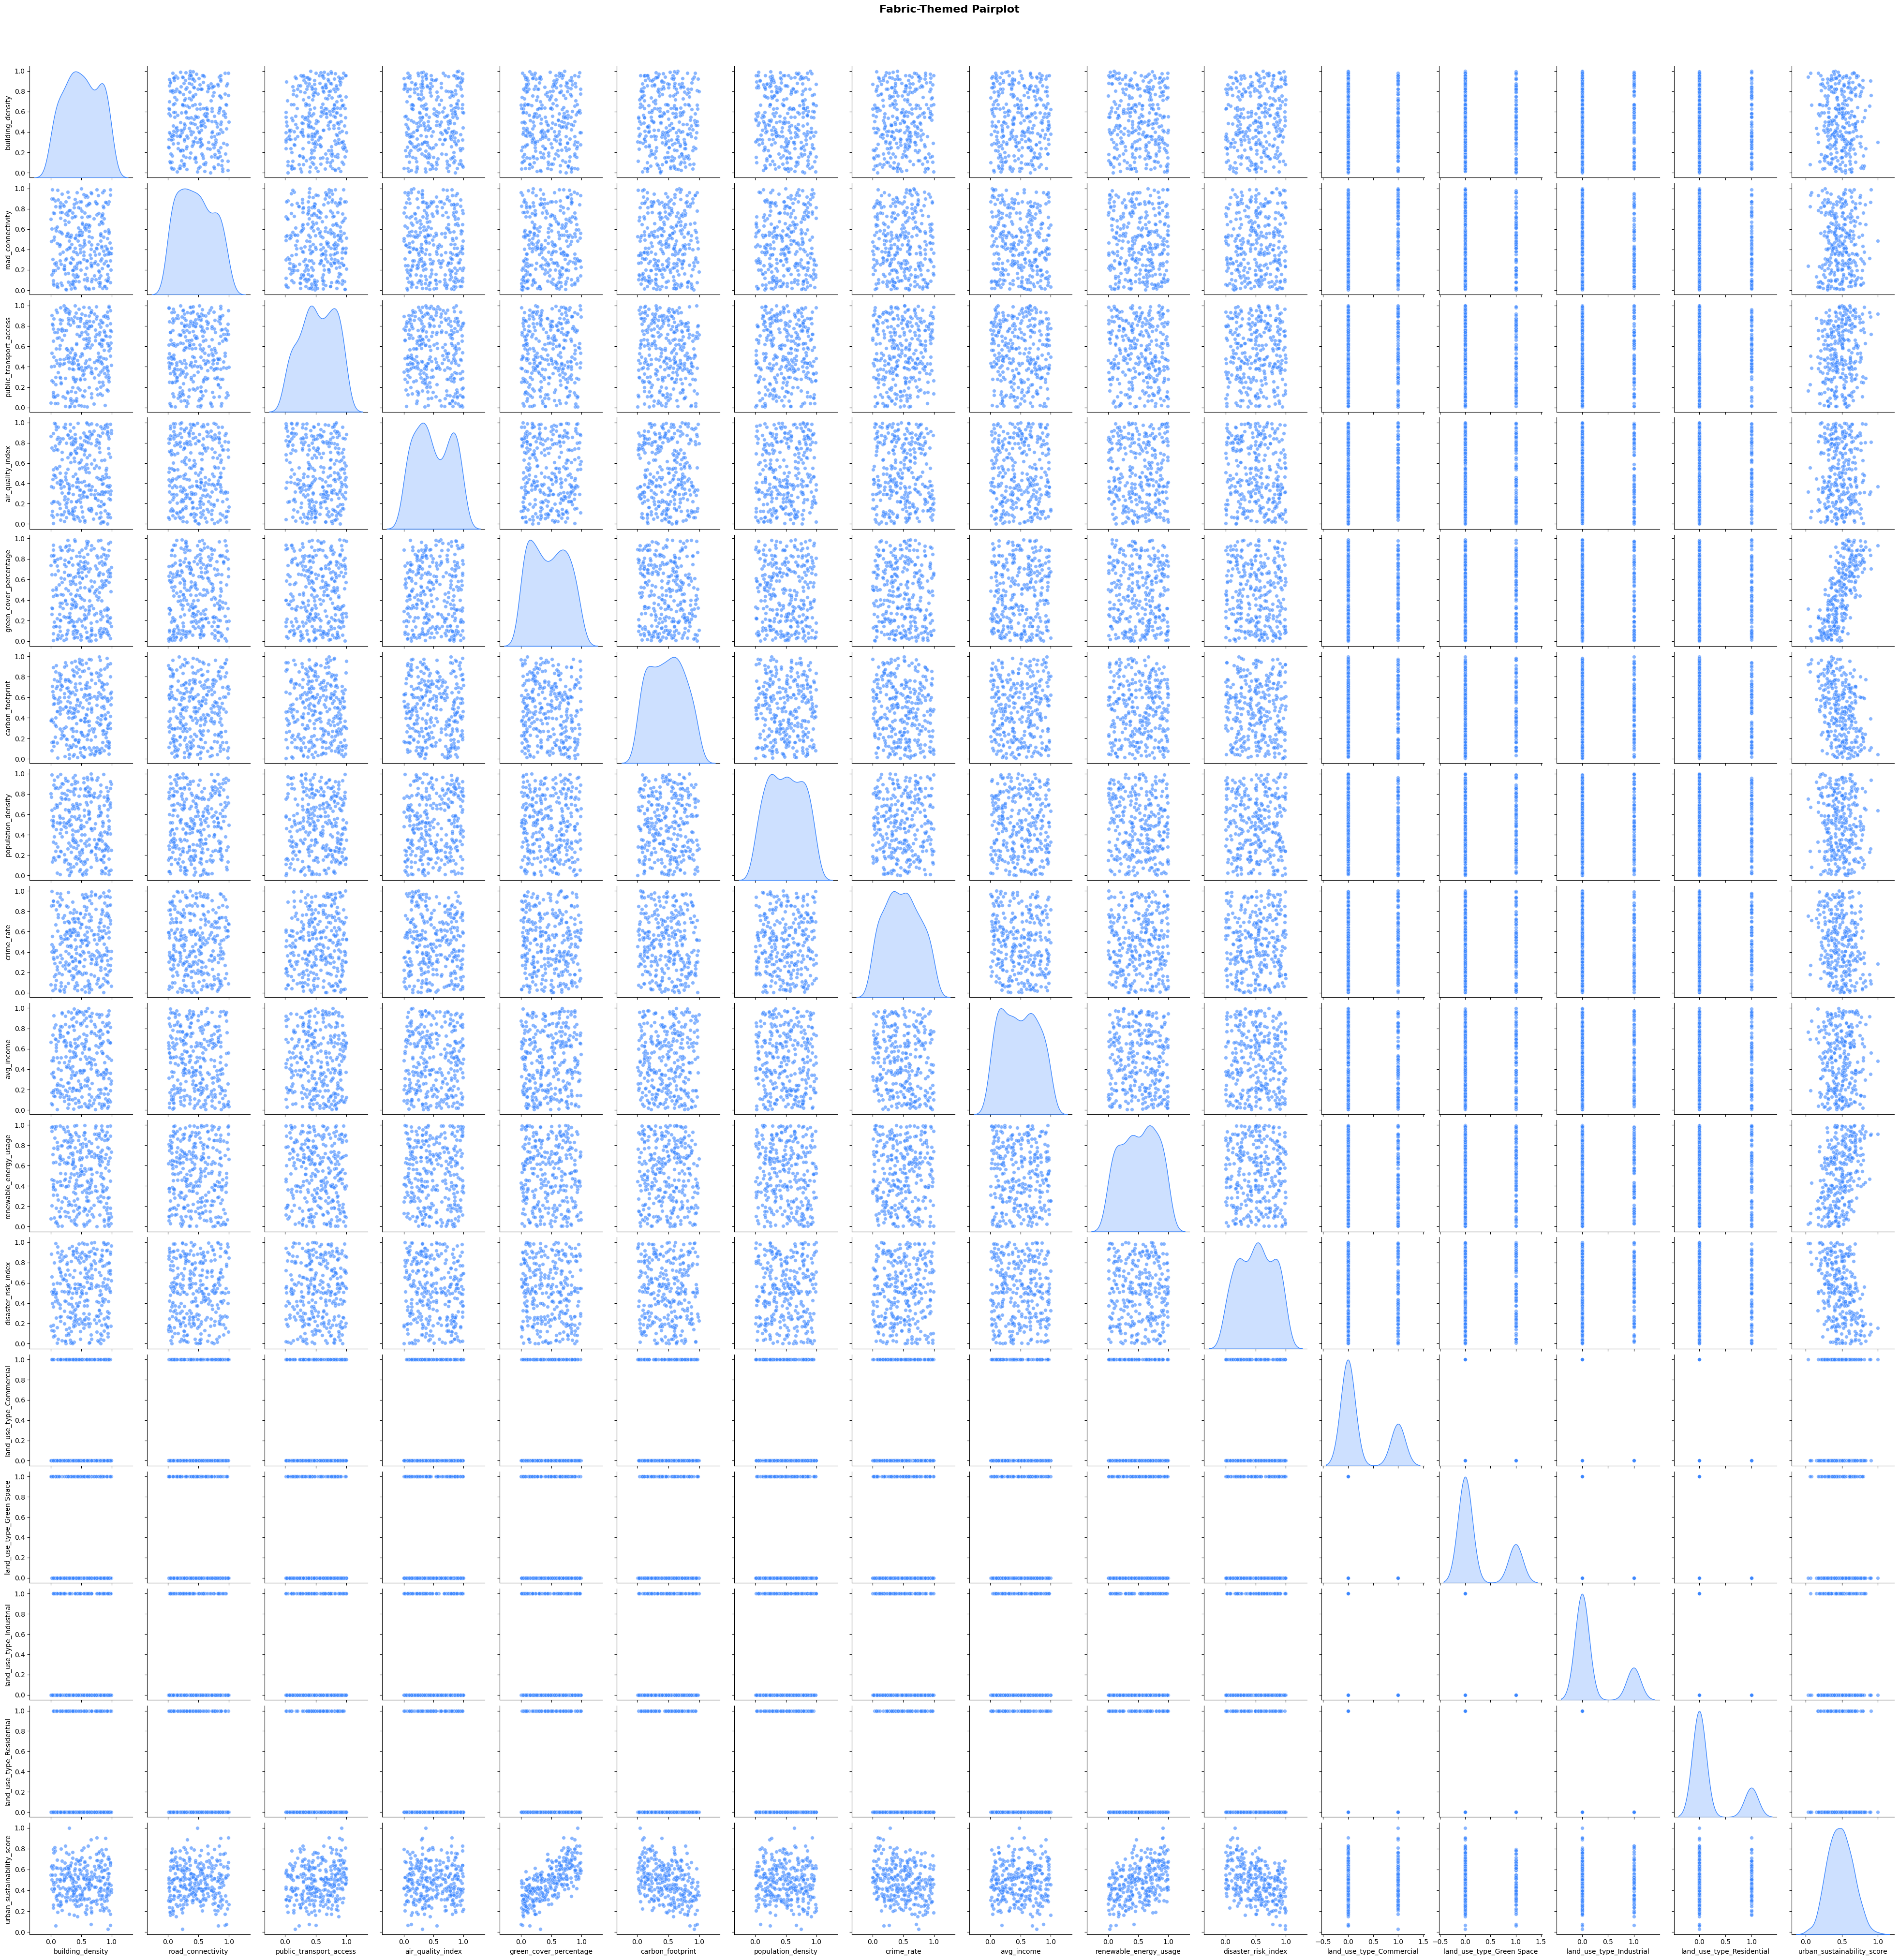

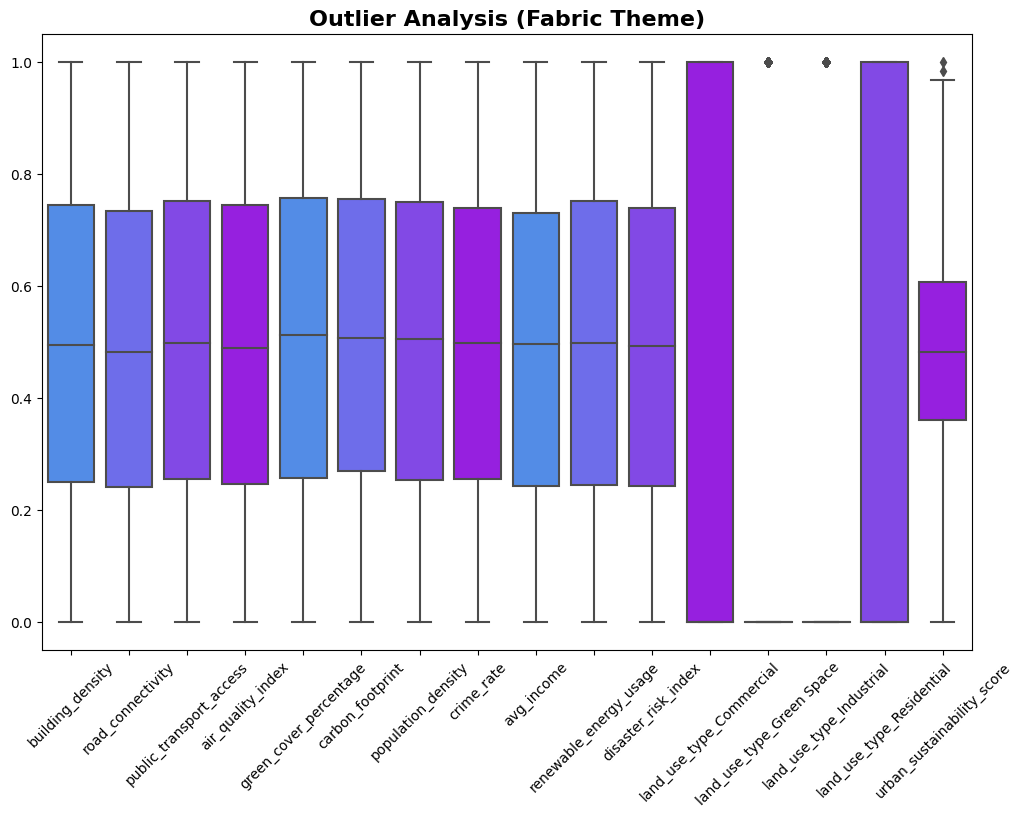

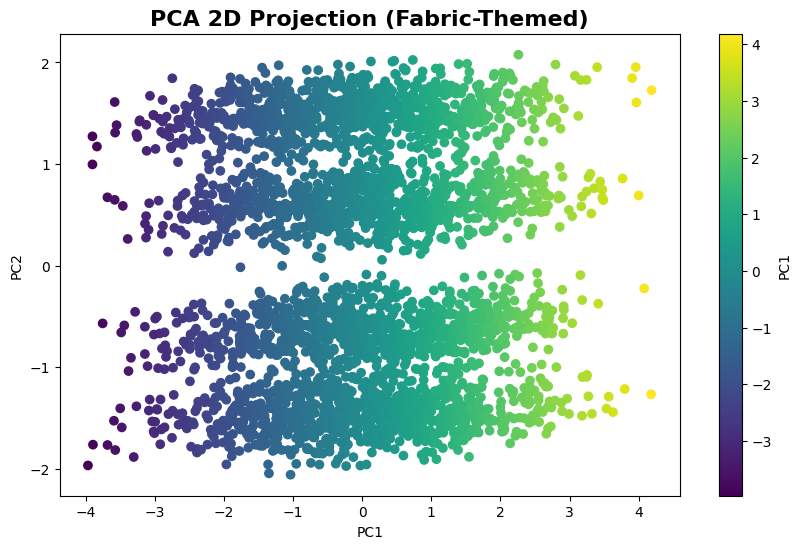

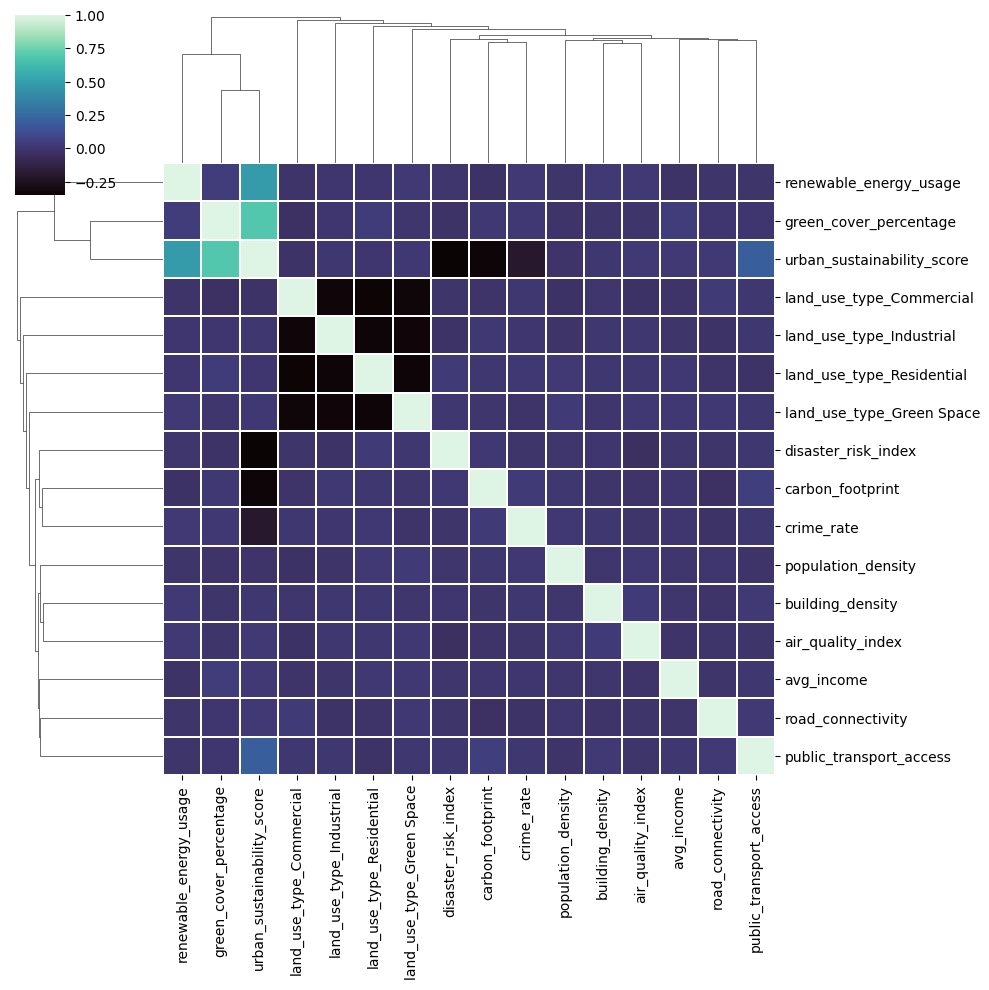

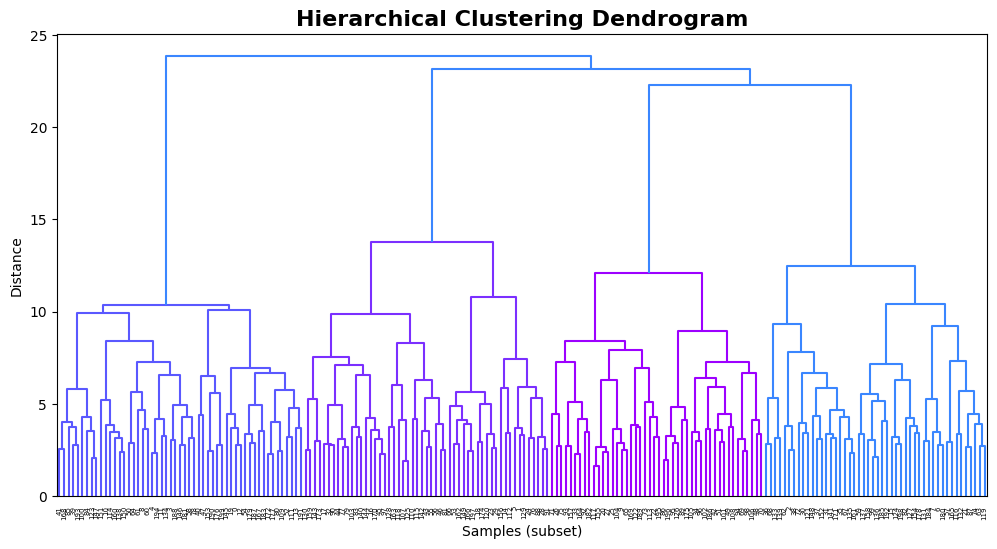

In [6]:
# EXPLORATORY DATA ANALYSIS (EDA)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings("ignore", message="use_inf_as_na")
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")
warnings.filterwarnings("ignore", category=FutureWarning)


# CLEANING (Fix Inf values before correlation or plots)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.median(numeric_only=True), inplace=True)
numeric_cols = df.select_dtypes(include='number').columns

# FABRIC COLOR PALETTE
fabric_colors = ["#3A86FF", "#5A58FF", "#7B2FFF", "#9D00FF"]
extended_palette = (fabric_colors * ((len(numeric_cols) // len(fabric_colors)) + 1))[:len(numeric_cols)]

# CORRELATION HEATMAP
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols].corr(), annot=False, cmap="viridis")
plt.title("Correlation Heatmap", fontsize=16, weight="bold")
plt.show()

# KDE DENSITY PLOTS
plt.figure(figsize=(14, 8))
for col, color in zip(numeric_cols, extended_palette):
    sns.kdeplot(df[col], fill=True, label=col, color=color, alpha=0.7)
plt.title("Fabric-Themed KDE Density Plot", fontsize=16, weight='bold')
plt.legend()
plt.show()

# PAIRPLOT
sns.set_palette(fabric_colors)
sns.pairplot(df[numeric_cols].sample(min(len(df), 300)),  # prevent huge slow plots
             diag_kind='kde',
             plot_kws={"alpha":0.6, "s":30})
plt.suptitle("Fabric-Themed Pairplot", y=1.02, fontsize=16, weight='bold')
plt.show()

# OUTLIER ANALYSIS (BOXPLOT)
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_cols], palette=extended_palette)
plt.title("Outlier Analysis (Fabric Theme)", fontsize=16, weight='bold')
plt.xticks(rotation=45)
plt.show()

# PCA (2D PROJECTION)
X = df[numeric_cols]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
plt.figure(figsize=(10, 6))
sc = plt.scatter(pca_result[:, 0], pca_result[:, 1],
                 c=pca_result[:, 0],
                 cmap="viridis")
plt.title("PCA 2D Projection (Fabric-Themed)", fontsize=16, weight='bold')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(sc, label="PC1")
plt.show()

# CLUSTER HEATMAP (CORRELATION)
sns.clustermap(df[numeric_cols].corr(),
               cmap="mako",
               linewidths=0.3)
plt.show()

# DENDROGRAM (HIERARCHICAL CLUSTERING)
sample_size = min(200, len(X_scaled))
X_small = X_scaled[:sample_size]
linked = linkage(X_small, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram", fontsize=16, weight='bold')
plt.xlabel("Samples (subset)")
plt.ylabel("Distance")
plt.show()

In [7]:
# INTERACTIVE DASHBOARD
fig = px.scatter(
    df,
    x="green_cover_percentage",
    y="air_quality_index",
    color="urban_sustainability_score",
    title="Interactive Urban Sustainability Dashboard",
    size="renewable_energy_usage",
    hover_data=df.columns
)
fig.show()
fig = px.histogram(
    df,
    x="urban_sustainability_score",
    nbins=20,
    title="Distribution of Sustainability Score",
    color="urban_sustainability_score",
    template="plotly_white"
)
fig.show()
fig = px.box(
    df,
    y=["air_quality_index", "crime_rate", "carbon_footprint"],
    title="Environmental & Social Risk Indicators",
    template="plotly_white"
)
fig.show()

In [8]:
# PCA + CLUSTER ANALYSIS
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=["urban_sustainability_score"]))
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df["pca1"] = pca_result[:, 0]
df["pca2"] = pca_result[:, 1]
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_scaled)
fig = px.scatter(
    df,
    x="pca1",
    y="pca2",
    color=df["cluster"].astype(str),
    title="City Clusters (PCA 2D Projection)",
    hover_data=df.columns
)
fig.show()

In [9]:
# MODEL TRAINING
X = df.drop(columns=["urban_sustainability_score"])
y = df["urban_sustainability_score"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# RANDOM FOREST
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_rmse = (mean_squared_error(y_test, rf_pred))**0.5
rf_r2 = r2_score(y_test, rf_pred)
print("Random Forest RMSE:", rf_rmse)
print("Random Forest R2:", rf_r2)

# XGBOOST
xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8
)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_rmse = (mean_squared_error(y_test, xgb_pred))**0.5
xgb_r2 = r2_score(y_test, xgb_pred)
print("XGBoost RMSE:", xgb_rmse)
print("XGBoost R2:", xgb_r2)

Random Forest RMSE: 0.04166317086826676
Random Forest R2: 0.9426948177736469
XGBoost RMSE: 0.020632489027310814
XGBoost R2: 0.985946240932072


In [10]:
# FEATURE IMPORTANCE
fi = pd.DataFrame({
    "feature": X.columns,
    "importance": rf.feature_importances_
}).sort_values(by="importance", ascending=False)
fig = px.bar(
    fi,
    x="importance",
    y="feature",
    title="Feature Importance (Random Forest)",
    orientation="h",
    template="plotly_white"
)
fig.show()
fi.head()

feature  importance
4    green_cover_percentage    0.474315
9    renewable_energy_usage    0.211180
10      disaster_risk_index    0.107246
5          carbon_footprint    0.101948
2   public_transport_access    0.036733

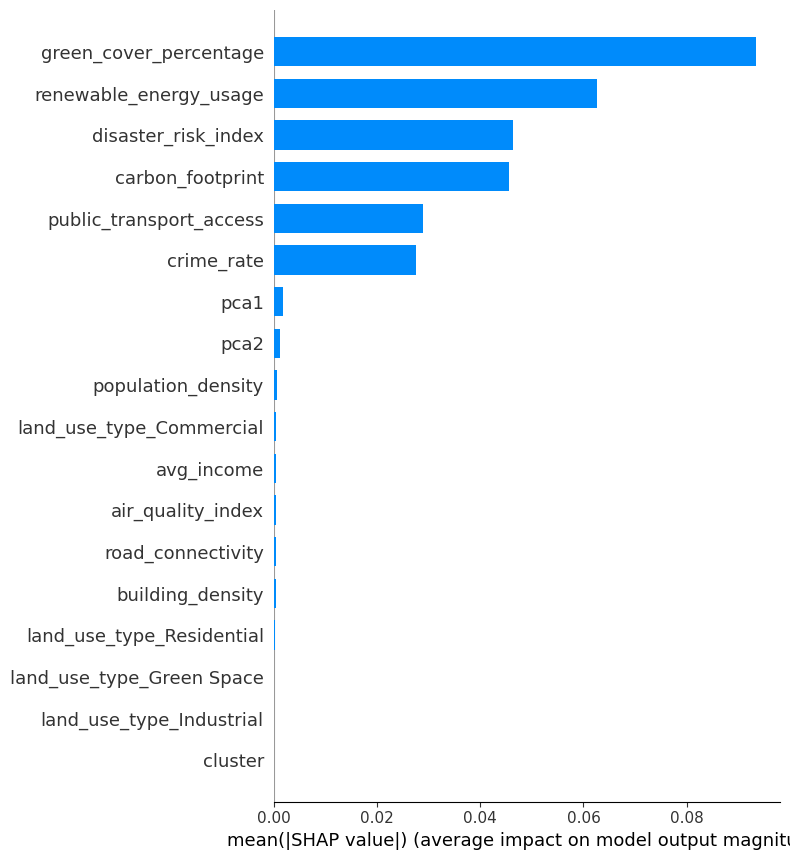

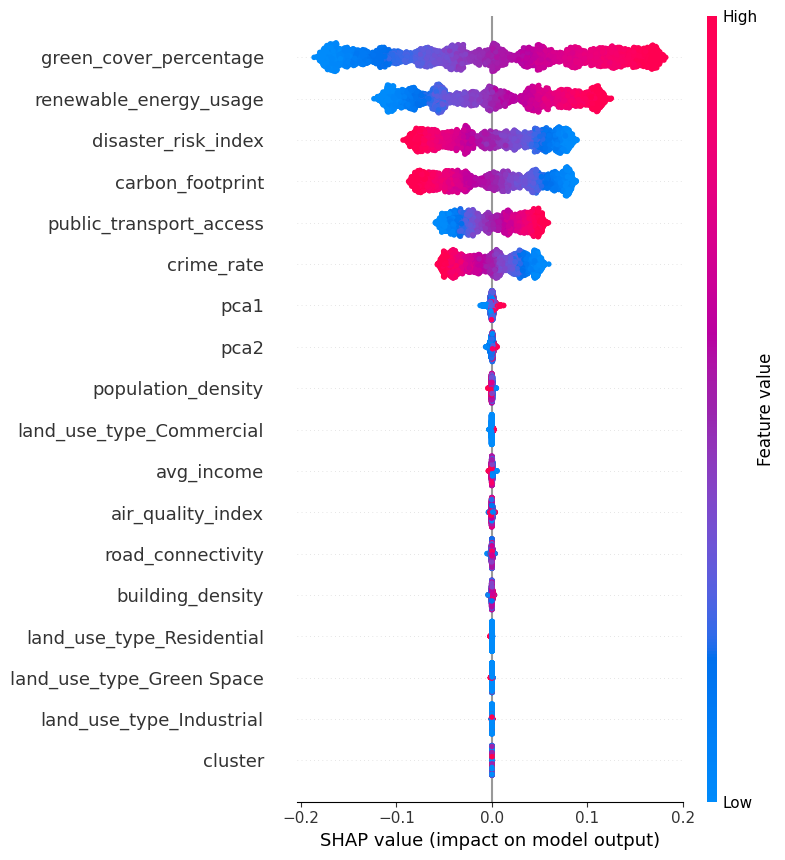

In [11]:
# SHAP EXPLAINABILITY
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")
shap.summary_plot(shap_values, X)

In [12]:
# CUSTOM URBAN SUSTAINABILITY INDEX (NEW METRIC)
df["custom_sustainability_index"] = (
    0.25 * df["green_cover_percentage"] +
    0.20 * (1/df["air_quality_index"]) +
    0.20 * df["renewable_energy_usage"] +
    0.15 * (1/df["carbon_footprint"]) +
    0.20 * df["public_transport_access"]
)
px.histogram(
    df,
    x="custom_sustainability_index",
    title="Distribution of Custom Sustainability Index"
).show()

In [13]:
# WHAT-IF SIMULATION TOOL
def simulate_sustainability(green_increase=0, renewable_increase=0):
    test = X_test.copy()
    test["green_cover_percentage"] += green_increase
    test["renewable_energy_usage"] += renewable_increase
    prediction = xgb.predict(test)
    return prediction.mean()
print("Baseline:", xgb_pred.mean())
print("If green cover increases by 10:", simulate_sustainability(10,0))
print("If renewable energy increases by 5:", simulate_sustainability(0,5))

Baseline: 0.48506436
If green cover increases by 10: 0.6513041
If renewable energy increases by 5: 0.59982806


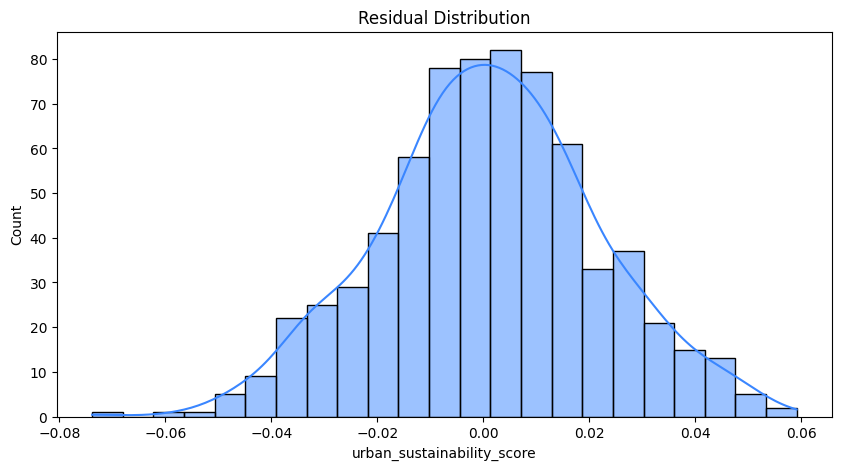

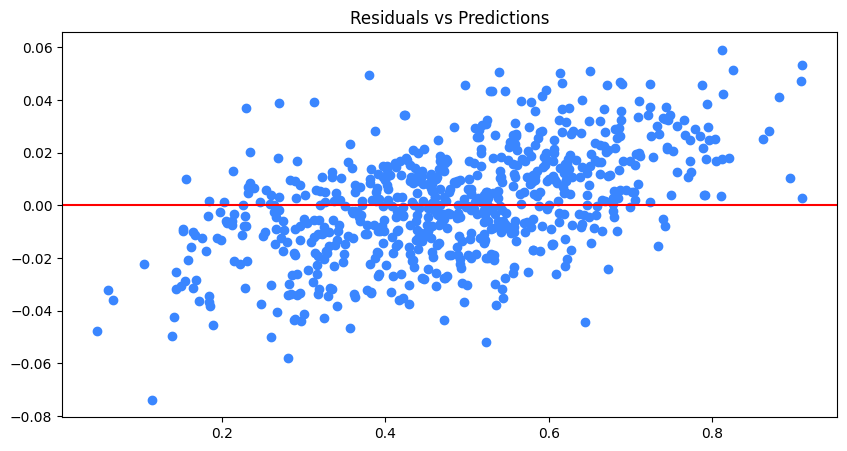

In [14]:
# RESIDUAL DIAGNOSTICS
residuals = y_test - xgb_pred
residuals = pd.Series(residuals).replace([np.inf, -np.inf], np.nan).dropna()
plt.figure(figsize=(10,5))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()
plt.figure(figsize=(10,5))
plt.scatter(xgb_pred, residuals)
plt.axhline(0, color="red")
plt.title("Residuals vs Predictions")
plt.show()